In [6]:
# importing libs
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [7]:
df = pd.read_csv("/content/drive/MyDrive/DRIVE_DATASETS/perosonalWork/insurance_claims.csv")

In [8]:
df

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,1991-07-16,OH,500/1000,1000,1310.80,0,431289,...,?,87200,17440,8720,61040,Honda,Accord,2006,N,NaN
996,285,41,186934,2014-01-05,IL,100/300,1000,1436.79,0,608177,...,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N,NaN
997,130,34,918516,2003-02-17,OH,250/500,500,1383.49,3000000,442797,...,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N,NaN
998,458,62,533940,2011-11-18,IL,500/1000,2000,1356.92,5000000,441714,...,YES,46980,5220,5220,36540,Audi,A5,1998,N,NaN


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

The info() method prints information about the DataFrame. The information contains the number of columns, column labels, column data types, memory usage, range index, and the number of cells in each column (non-null values).

In [12]:
df.describe()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,_c39
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,0.0
mean,203.954000,38.948000,546238.648000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000,NaN
std,115.113174,9.140287,257063.005276,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861,NaN
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000,NaN
25%,115.750000,32.000000,335980.250000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000,NaN
50%,199.500000,38.000000,533135.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000,NaN
75%,276.250000,44.000000,759099.750000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000,NaN
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000,NaN


The describe() method returns description of the data in the DataFrame. If the DataFrame contains numerical data, the description contains these information for each column: count - The number of not-empty values. mean - The average (mean) value. std - The standard deviation.

# Data Cleaning


*   Replace ? values with np.nan (property_damage collision_type police_report_available)
*   Droping _c39 because this column contains 1k nan values
*   Replacing nan values with most occure values in categorical columns



In [13]:
df["collision_type"].value_counts()

Rear Collision     292
Side Collision     276
Front Collision    254
?                  178
Name: collision_type, dtype: int64

Testing: Count the occurrences of each value in the 'collision_type' column

In [14]:
df.replace('?', np.nan, inplace = True)

dataset has missing values as "?" we are going to replace these values with nan values

In [15]:
df.isna().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                  178
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

check missing values

In [16]:
df.drop("_c39",1,inplace=True)

<ipython-input-16-1e56d6ffa27e>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df.drop("_c39",1,inplace=True)


col _c39 have 1k null values we are going to drop that col

These column has null values as '?' we are goint to replace ? with np.nan <br>
police_report_available -- 343 <br>
property_damage -- 360 <br>
collision_type  -- 178 <br>


In [17]:
df['police_report_available'].value_counts(dropna=False)

NaN    343
NO     343
YES    314
Name: police_report_available, dtype: int64

Checking Nan values

In [18]:
df['property_damage'].value_counts(dropna=False)

NaN    360
NO     338
YES    302
Name: property_damage, dtype: int64

Checking Nan values

In [19]:
df["collision_type"].value_counts(dropna=False)

Rear Collision     292
Side Collision     276
Front Collision    254
NaN                178
Name: collision_type, dtype: int64

Checking Nan values

In [20]:
df['property_damage'] = df['property_damage'].fillna(df['property_damage'].mode()[0])
df['collision_type'] = df['collision_type'].fillna(df['collision_type'].mode()[0])
df['police_report_available'] = df['police_report_available'].fillna(df['police_report_available'].mode()[0])

we are going replace nan values with most occured values from the column

In [21]:
df[['property_damage', 'collision_type', 'police_report_available']].isna().sum()

property_damage            0
collision_type             0
police_report_available    0
dtype: int64

Re checking null values

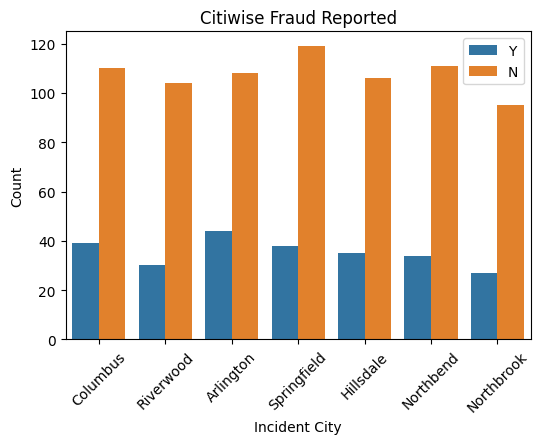

In [22]:
# incident_city

plt.figure(figsize=(6,4))
sns.countplot(x=df['incident_city'],hue=df["fraud_reported"]).set(title="Citiwise Fraud Reported",xlabel="Incident City",ylabel="Count")
plt.legend(loc='upper right')
plt.xticks(rotation=45)
plt.show()

# Feature Selection

In Feature selection only a few variables in the dataset are useful for building the model, and the rest features are either redundant or irrelevant. If we input the dataset with all these redundant and irrelevant features, it may negatively impact and reduce the overall performance and accuracy of the model.


*   Created age_range new columns from age column
*   Created time of the day column from incident_hour_of_the_day
*   Created games (indoor games and outdoor games) column from hobbies columns to see which kind of games cause increae in insurance claim
*   Using correlation method we are going to drop columns
*   Droping Column are not nessecary for creating machine learning model




In [23]:
# Define functions for creating new features based on 'age'
def age_range(x):
    if x <20:
        return "Young"
    elif x > 20 and x < 60:
        return "Adult"
    else:
        return "Senior"

# Define functions for creating new features based on 'incident_hour_of_the_day'
def categorize_time(hour):
    if 6 <= hour < 12:
        return 'morning'
    elif 12 <= hour < 18:
        return 'afternoon'
    else:
        return 'night'


df["age_range"] = df["age"].apply(age_range)
df["time_of_day"] = df["incident_hour_of_the_day"].apply(categorize_time)

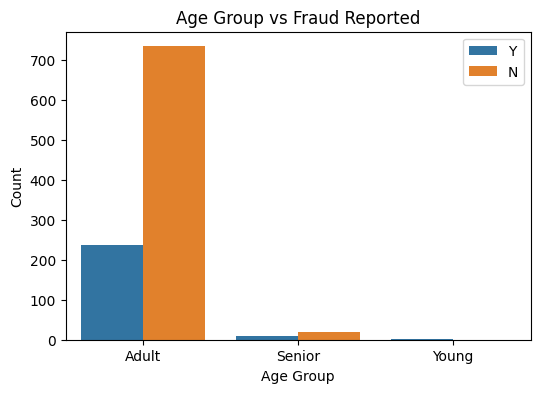

In [24]:
plt.figure(figsize=(6,4))
sns.countplot(x=df["age_range"],hue = df["fraud_reported"]).set(title="Age Group vs Fraud Reported",xlabel="Age Group",ylabel="Count")
plt.legend(loc='upper right')
plt.show()

lets plot age_range vs fraud_reported <br>
As we can see False Fraude reported by the adult as compare to Senior and Yound Category

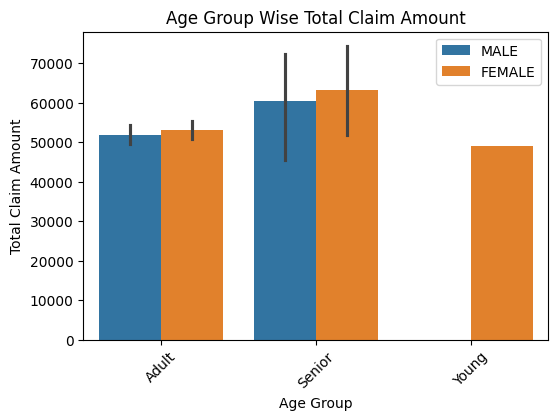

In [25]:
plt.figure(figsize=(6,4))
sns.barplot(x=df["age_range"], y=df['total_claim_amount'],hue=df["insured_sex"]).set(title="Age Group Wise Total Claim Amount", xlabel="Age Group",ylabel="Total Claim Amount" )
plt.legend(loc='upper right')
plt.xticks(rotation=45)
plt.show()

Here we can see total claim amount for Senior category is max

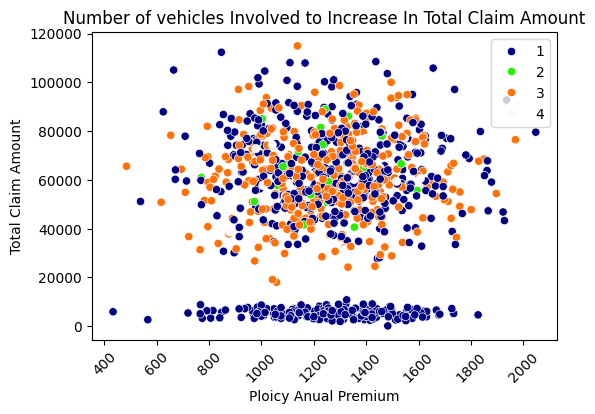

In [26]:
plt.figure(figsize=(6,4))
sns.scatterplot(data=df,x="policy_annual_premium",y="total_claim_amount",hue="number_of_vehicles_involved",palette="gist_ncar").set(title="Number of vehicles Involved to Increase In Total Claim Amount", xlabel="Ploicy Anual Premium",ylabel="Total Claim Amount" )
plt.legend(loc='upper right')
plt.xticks(rotation=45)
plt.show()

Number of vehicles involved for increase in total claim amount



In [27]:
# Here we are going to classify hobbies in to indoor and outdoor games (Games which we can play iside dont need to travel vs games which need to travel)
in_games = ['reading',  'video-games', 'chess']
out_games =   ['paintball', 'bungie-jumping', 'golf', 'camping', 'kayaking', 'yachting',
                     'hiking', 'skydiving', 'base-jumping', 'polo', 'basketball','exercise', 'paintball', 'movies', 'golf', 'camping']

def clf_games(value):
    if value in in_games:
        return "in_games"
    return "out_games"
df["games"]  =  df["insured_hobbies"].apply(clf_games)

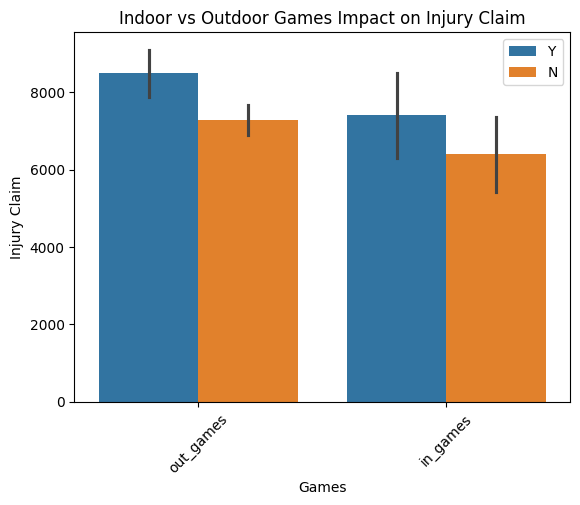

In [28]:
# plt.figure(figsize=(6,4))
sns.barplot(data=df, x ="games" ,y="injury_claim",hue="fraud_reported").set(title="Indoor vs Outdoor Games Impact on Injury Claim",xlabel="Games",ylabel="Injury Claim")
plt.legend(loc='upper right')
plt.xticks(rotation=45)
plt.show()

##### Graph Person we goes outside for playing 'golf, skdiving' etc has injury claim more as compared to person who do 'reading',  'video-games', 'chess'

In [29]:

to_drop =  ['policy_state', 'policy_csl', 'incident_date', 'incident_state', 'incident_city', 'incident_location']

df.drop(to_drop,axis = 1,inplace=True)

Dropping columns which are not necessary for prediction


#### Multicollinearity is a statistical phenomenon that occurs when two or more independent variables in a regression model are highly correlated with each other. In other words, multicollinearity indicates a strong linear relationship among the predictor variables. This can create challenges in the regression analysis because it becomes difficult to determine the individual effects of each independent variable on the dependent variable accurately.

#### Here df.corr() give matrix for Multicollinearity, then we use use this matrix with searborn/matplotlib to plot realation which we can understand visually.


Column which are correlated whi are each other are brighter in color in graph. range(0 to 1)



<ipython-input-30-ba61737bfdd7>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


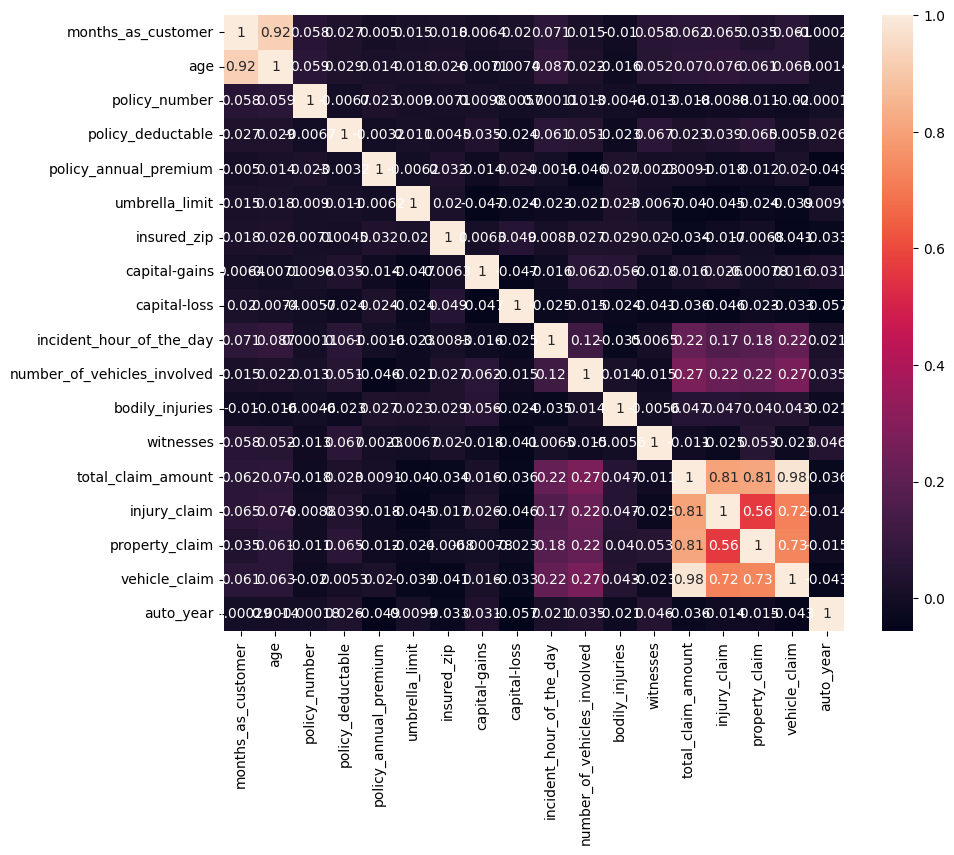

In [30]:
# checking for multicollinearity
plt.figure(figsize = (10, 8))
corr = df.corr()
sns.heatmap(data = corr, annot = True, fmt = '.2g')
plt.show()

When 1 independent feature(X1) is highly correlated with the other independent feature(X2) , than this situation is called as Multicollinearity. Here correlation means when there is a change in 1 feature than it affects the other feature as well. Correlation can be both positive as well as negative. For example , when X1 is increasing then X2 is also increasing shows the positive correlation whereas when X2 is decreasing than it is a case of Negative correlation.

Due to the presence of collinearity/multi-collinearity, it becomes difficult to isolate the individual effects of explanatory variables on the response variable.


In [31]:
df.drop(columns = ['age', 'total_claim_amount'], inplace = True, axis = 1)

 we are going to drop "age" &  "total_claim_amount" because these two column has multicollinearity with other cols
"age" has multicollinearity with "months_as_customer"   & "total_claim_amount" has multicollinearity with  "injury_claim, property_claim, vehicle_claim "


Multicollinearity occurs when two or more independent variables in a data frame have a high correlation with one another in a regression model.

This means that one independent variable can be predicted from another in a regression model. For example, sets like height and weight, household income and water consumption, mileage and the price of a car, study time and leisure time, etc.

In [32]:
bins = [0, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500]
bin_labels = ['0-50','51-100','101-150','151-200','201-250','251-300','301-350','351-400','401-450','451-500']

df['months_as_customer_groups'] = pd.cut(df['months_as_customer'], bins = 10, labels = bin_labels, include_lowest= True)


Converting months_as_customer so we dont need to create extra columns while getting one hot encoded values

In [33]:
required_columns = ['insured_sex', 'insured_education_level', 'insured_occupation',
       'insured_hobbies', 'capital-gains', 'capital-loss', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_hour_of_the_day', 'number_of_vehicles_involved',
       'witnesses',
       'injury_claim', 'property_claim', 'vehicle_claim',
       'fraud_reported', 'age_range',
       'months_as_customer_groups']

In [34]:
# selecting only req columns
final_df = df[required_columns]

In [35]:
final_df.select_dtypes("O").columns.to_list()

['insured_sex',
 'insured_education_level',
 'insured_occupation',
 'insured_hobbies',
 'incident_type',
 'collision_type',
 'incident_severity',
 'authorities_contacted',
 'fraud_reported',
 'age_range']

Taking only Categorical values to get one hot encoded values

In [36]:
cat_cols = ['insured_sex',
 'insured_education_level',
 'insured_occupation',
 'insured_hobbies',
 'incident_type',
 'collision_type',
 'incident_severity',
 'authorities_contacted',
 'age_range','months_as_customer_groups']

In [37]:
new_df = pd.get_dummies(final_df, columns = cat_cols )


One Hot Encoding

One Hot Encoding using pd.dummies

Above we perfrmed on hot encoding on categorical columns

One hot encoding is a technique that we use to represent categorical variables as numerical values in a machine learning model.

The advantages of using one hot encoding include:

It allows the use of categorical variables in models that require numerical input.
It can improve model performance by providing more information to the model about the categorical variable.
It can help to avoid the problem of ordinality, which can occur when a categorical variable has a natural ordering (e.g. “small”, “medium”, “large”).


In [38]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
new_df["fraud_reported"]=  le.fit_transform(new_df["fraud_reported"])

Label Encoding is a technique that is used to convert categorical columns into numerical ones so that they can be fitted by machine learning models which only take numerical data. It is an important pre-processing step in a machine-learning project.

In [39]:
le.classes_

array(['N', 'Y'], dtype=object)

printing classes of target variable

In [40]:
X = new_df.drop("fraud_reported",1)
Y = new_df["fraud_reported"]

<ipython-input-40-4444542001e7>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = new_df.drop("fraud_reported",1)


Split the data into features (X) and target variable (Y) for Training

# Splitting Dataset

The train_test_split() method is used to split our data into train and test sets.

In this method random shuffling method is used. After shuffling we split them in to train and test split.

Here we used 70% for training and 30% for testing.

First, we need to divide our data into features (X) and labels (y). The dataframe gets divided into X_train,X_test , y_train and y_test. X_train and y_train sets are used for training and fitting the model. The X_test and y_test sets are used for testing the model if it’s predicting the right outputs/labels. we can explicitly test the size of the train and test sets. It is suggested to keep our train sets larger than the test sets.






In [41]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.30)

Split the data into training and testing sets

Train test split technique is used to estimate the performance of machine learning algorithms which are used to make predictions on data not used to train the model.

# Standardization
Scaling is a crucial preprocessing step to ensure that the input features are on a consistent scale, making it easier for machine learning algorithms to learn patterns from the data. It can lead to better model performance, faster convergence during training, and increased interpretability of model parameters.

In [42]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(x_train)

x_train_scaled = sc.transform(x_train)
x_test_scaled = sc.transform(x_test)

Scaling Dataset
Standardization scales each input variable separately by subtracting the mean (called centering) and dividing by the standard deviation to shift the distribution to have a mean of zero and a standard deviation of one.

[Text(0.5, 1.0, 'Frud Reported Count')]

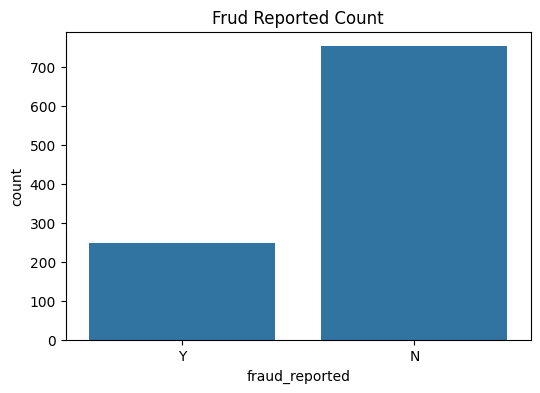

In [43]:
plt.figure(figsize=(6,4))
sns.countplot(data=final_df, x="fraud_reported").set(title="Frud Reported Count")

Imbalance dataset <br>
When a dataset is imbalanced, several issues may arise. Models may exhibit bias toward the majority class, resulting in poor predictions for the minority class. Accuracy as an evaluation metric can be misleading, as it may appear high while the model's performance on the minority class is lacking. <br>
We have to blance this dataset or it may perform good only in  majority class scenarios.

# Balancing Dataset

Models trained on imbalanced datasets may become biased towards the majority class. Since there are more instances of the majority class, the model may focus more on learning patterns related to that class, leading to poor performance on the minority class.

SMOTE (Synthetic Minority Over-sampling Technique) is a technique used in the field of machine learning to address the class imbalance problem. Class imbalance occurs when one class in the target variable has significantly fewer instances than another class. SMOTE is specifically designed to tackle the imbalance by generating synthetic examples of the minority class, making it more balanced.


In [44]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=24)
new_x,new_y = sm.fit_resample(x_train_scaled,y_train)

Address class imbalance using SMOTE (Synthetic Minority Over-sampling Technique)
SMOTE is specifically designed to tackle imbalanced datasets by generating synthetic samples for the minority class.

<Axes: xlabel='fraud_reported', ylabel='count'>

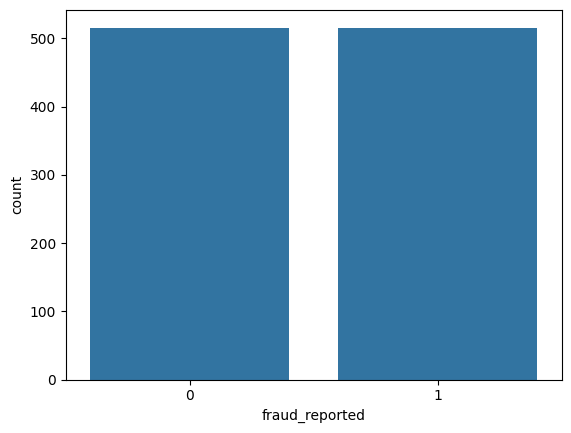

In [45]:
sns.countplot(data=final_df,x=new_y)

Visualize the balanced dataset After SMOTE
Dataset is blanced now

In [46]:
from sklearn.metrics import accuracy_score, classification_report

    Precision focuses on the accuracy of positive predictions.
    Recall focuses on capturing all actual positive instances.
    Accuracy provides an overall measure of correctness, considering both positive and negative predictions.
    Support is the number of actual occurrences of a class in the specified dataset. It represents the number of instances

These metrics are useful for understanding different aspects of a classification model's performance, and the choice of which to prioritize depends on the specific goals and requirements of the application.

A classification report is a comprehensive summary of the performance of a classification model. It typically includes several metrics, including precision, recall, F1-score, and support, for each class in the dataset. This report is useful for gaining insights into how well the model is performing on different classes and can help identify areas that may need improvement.

In [47]:
# Model Logistic Regression
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(new_x,new_y)
y_pred = lr.predict(x_test_scaled)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.85      0.90       237
           1       0.60      0.84      0.70        63

    accuracy                           0.85       300
   macro avg       0.77      0.84      0.80       300
weighted avg       0.88      0.85      0.86       300



In [48]:
# Model Random Forrest
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(new_x,new_y)

y_pred = rf.predict(x_test_scaled)

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.86      0.87       237
           1       0.52      0.54      0.53        63

    accuracy                           0.80       300
   macro avg       0.70      0.70      0.70       300
weighted avg       0.80      0.80      0.80       300



In [49]:
# Model K Neares Neighbors
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(new_x,new_y)
knn.score(x_test_scaled,y_test)

y_pred = knn.predict(x_test_scaled)
print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

           0       0.97      0.49      0.65       237
           1       0.33      0.94      0.48        63

    accuracy                           0.58       300
   macro avg       0.65      0.71      0.56       300
weighted avg       0.83      0.58      0.61       300



    Logistic Regression (Model 1):
        Higher precision, recall, and F1-score for both classes compared to other models.
        Highest overall accuracy (0.85).
        Well-balanced performance for both classes.

    Random Forest (Model 2):
        Moderate precision, recall, and F1-score for both classes.
        Lower accuracy compared to Logistic Regression (0.80).
        Balanced performance but not as high as Logistic Regression.

    KNN (Model 3):
        High precision for class 0 but lower recall.
        Very high recall for class 1 but lower precision.
        Lowest overall accuracy (0.58).
        Imbalanced performance with a trade-off between precision and recall.

Conclusion:

    Logistic Regression (Model 1) appears to be the better-performing model based on the provided metrics. It has higher precision, recall, and F1-score for both classes, and it achieves the highest overall accuracy.
    Random Forest (Model 2) is a moderate performer with balanced precision and recall but falls short of Logistic Regression in terms of accuracy.
    KNN (Model 3) has imbalanced performance, particularly with low precision for class 1 and the lowest overall accuracy.

In summary, based on the given metrics, Logistic Regression is the preferred choice among the three models for this specific classification task.

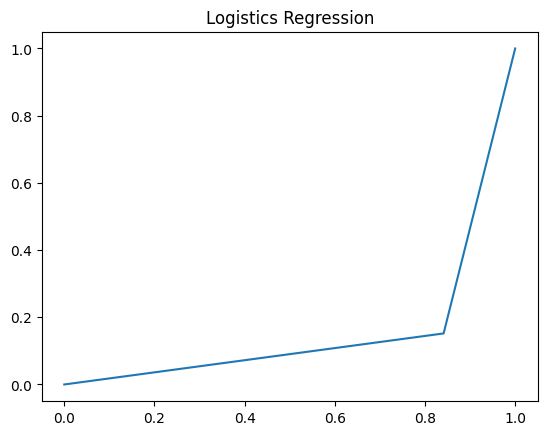

AUC: 0.15531444645368697


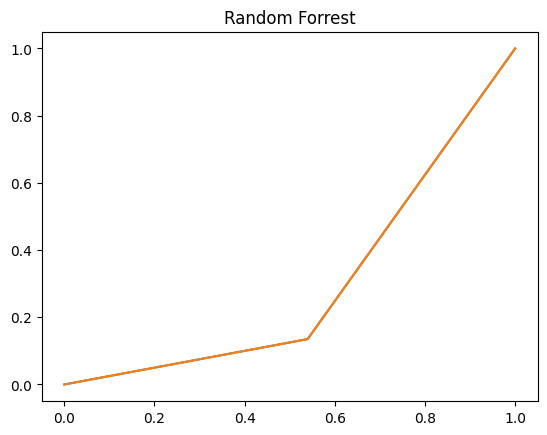

AUC: 0.29766927868193693


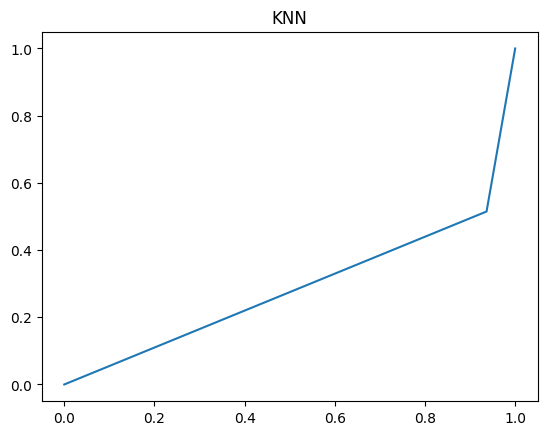

AUC: 0.2891299979907575


In [58]:
from sklearn import metrics


# logistic regression
fpr, tpr, thresholds = metrics.roc_curve(y_test, lr.predict(x_test_scaled), pos_label=0)

# Print ROC curve
plt.title("Logistics Regression")
plt.plot(fpr,tpr)
plt.show()

# Print AUC
auc = np.trapz(tpr,fpr)
print('AUC:', auc)


# KNN
fpr, tpr, thresholds = metrics.roc_curve(y_test, rf.predict(x_test_scaled), pos_label=0)

plt.title("Random Forrest")
plt.plot(fpr,tpr)
# Print ROC curve
plt.plot(fpr,tpr)
plt.show()

# Print AUC
auc = np.trapz(tpr,fpr)
print('AUC:', auc)



# KNN
fpr, tpr, thresholds = metrics.roc_curve(y_test, knn.predict(x_test_scaled), pos_label=0)

# Print ROC curve
plt.title("KNN")
plt.plot(fpr,tpr)
plt.show()

# Print AUC
auc = np.trapz(tpr,fpr)
print('AUC:', auc)







In [50]:
import joblib

Saving Model Using Joblib Library <br>
To load the model we have to use same library

In [ ]:
joblib.dump(lr,"logisticRegression.pkl")

['logisticRegression.pkl']

In [ ]:
joblib.dump(rf,"RandomForrest.pkl")

['RandomForrest.pkl']

In [ ]:
joblib.dump(knn,"KNN.pkl")

['KNN.pkl']